In [2]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

2024-06-24 10:11:03.648487: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-24 10:11:03.652891: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-24 10:11:03.702835: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 10:11:04.782927: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
START = "2020-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data('BTC-USD')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7194.892090,7254.330566,7174.944336,7200.174316,18565664997
1,7202.551270,7212.155273,6935.270020,6985.470215,20802083465
2,6984.428711,7413.715332,6914.996094,7344.884277,28111481032
3,7345.375488,7427.385742,7309.514160,7410.656738,18444271275
4,7410.451660,7544.497070,7400.535645,7411.317383,19725074095


## Visualize closing prices

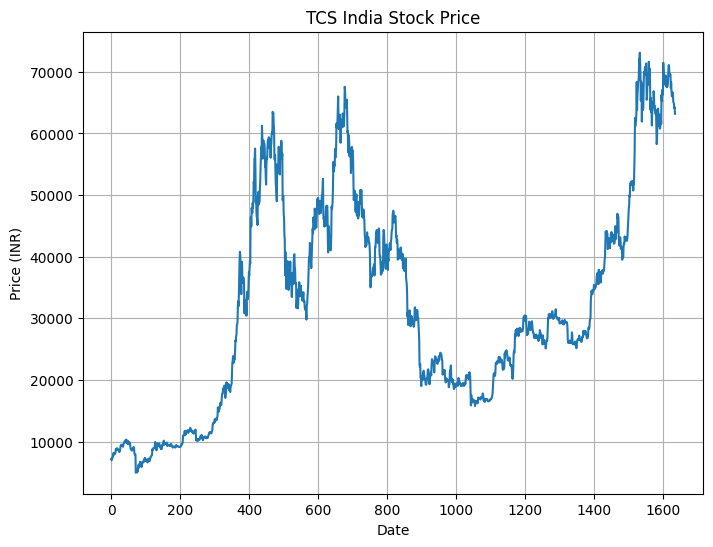

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

## moving average of 100 days

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
1631    66600.002461
1632    66533.476133
1633    66443.603125
1634    66372.162969
1635    66309.933203
Name: Close, Length: 1636, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

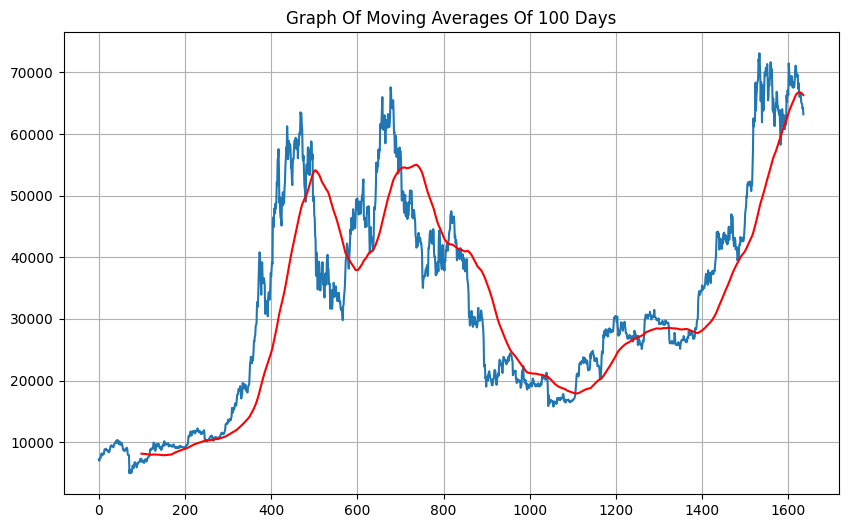

In [8]:
plt.figure(figsize = (10,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

## Spliting the dataset into training (70%) and testing (30%) set

In [9]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1145, 7)
(491, 7)


In [10]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


In [11]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1145,2023-02-19,24640.027344,25093.054688,24327.642578,24327.642578,24327.642578,25555105670
1146,2023-02-20,24336.623047,25020.458984,23927.910156,24829.148438,24829.148438,28987376573
1147,2023-02-21,24833.048828,25126.851562,24200.363281,24436.353516,24436.353516,31252098714
1148,2023-02-22,24437.417969,24472.339844,23644.318359,24188.843750,24188.843750,30199996781
1149,2023-02-23,24190.718750,24572.089844,23693.919922,23947.492188,23947.492188,30476264066


## MinMax scaler for normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [14]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.03561545],
       [0.03218546],
       [0.03792726],
       ...,
       [0.29798509],
       [0.31303599],
       [0.31424495]])

In [15]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [16]:
x_train.shape

(1045, 100, 1)

## LSTM MODEL

In [17]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))

/workspaces/Backtesting-Infrastructure-CryptoTrading/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

## Training the model

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,batch_size=32,epochs = 50)

Epoch 1/50


33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0384 - mean_absolute_error: 0.1328
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 0.0037 - mean_absolute_error: 0.0424
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0038 - mean_absolute_error: 0.0431
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - loss: 0.0032 - mean_absolute_error: 0.0390
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - loss: 0.0032 - mean_absolute_error: 0.0389
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - loss: 0.0035 - mean_absolute_error: 0.0399
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0031 - mean_absolute_error: 0.0385
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0028 - mean_absolute_error: 0.0358
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - loss: 0.0025 - mean_absolute_error: 0.0334
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0034 - mean_absolute_error: 0.0402
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5

In [21]:
model.save('model.h5')

In [22]:
test_close.shape

(491, 1)

In [23]:
past_100_days = pd.DataFrame(train_close[-100:])

In [24]:
test_df = pd.DataFrame(test_close)

In [25]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [26]:
final_df.head()

,0
0,17034.292969
1,16799.185547
2,16353.365234
3,16618.199219
4,16884.613281


In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02176424],
       [0.01766088],
       [0.0098799 ],
       [0.01450209],
       [0.01915186],
       [0.0153964 ],
       [0.01571192],
       [0.01589098],
       [0.0161313 ],
       [0.00880595],
       [0.        ],
       [0.00702464],
       [0.01437133],
       [0.01426238],
       [0.01282035],
       [0.01181574],
       [0.01147271],
       [0.00750552],
       [0.01147891],
       [0.02410774],
       [0.02059209],
       [0.02271312],
       [0.01956416],
       [0.02344312],
       [0.02072636],
       [0.02272785],
       [0.01851506],
       [0.02524059],
       [0.02348965],
       [0.02341237],
       [0.02298423],
       [0.02476871],
       [0.0348022 ],
       [0.0354014 ],
       [0.02753377],
       [0.01501321],
       [0.01758943],
       [0.01694165],
       [0.01138636],
       [0.01953044],
       [0.01798113],
       [0.01820465],
       [0.01762191],
       [0.01850858],
       [0.01840788],
       [0.01976606],
       [0.01622951],
       [0.013

In [28]:
input_data.shape

(591, 1)

## Testing the model

In [29]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [30]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(491, 100, 1)
(491,)


## predicting

In [31]:
y_pred = model.predict(x_test)

15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [32]:
y_pred.shape

(491, 1)

In [33]:
y_test

array([0.14905624, 0.1578091 , 0.15095359, 0.14663376, 0.14242141,
       0.12934262, 0.12894553, 0.13567962, 0.13501043, 0.12845646,
       0.13716903, 0.13418308, 0.11476143, 0.11459859, 0.11603261,
       0.11593215, 0.11226719, 0.10351113, 0.07986107, 0.0767932 ,
       0.08456276, 0.11129295, 0.14678542, 0.15635919, 0.14989955,
       0.16171234, 0.20309623, 0.1951018 , 0.21382549, 0.20908802,
       0.21621903, 0.20106307, 0.21897936, 0.2043067 , 0.20433152,
       0.21305152, 0.19813882, 0.20037705, 0.21923188, 0.21373625,
       0.22150154, 0.22032434, 0.21662904, 0.20948917, 0.21608418,
       0.21625687, 0.21392087, 0.21185649, 0.21223933, 0.21896327,
       0.24200021, 0.25215931, 0.25048371, 0.25502177, 0.25653378,
       0.25361556, 0.25356075, 0.23837108, 0.25499535, 0.22750884,
       0.21744375, 0.20053028, 0.20996528, 0.20601885, 0.20486616,
       0.21851903, 0.22052795, 0.23887272, 0.23654228, 0.23494054,
       0.23529516, 0.21474864, 0.225028  , 0.23071374, 0.22794

In [34]:
scaler.scale_

array([1.74531596e-05])

In [35]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

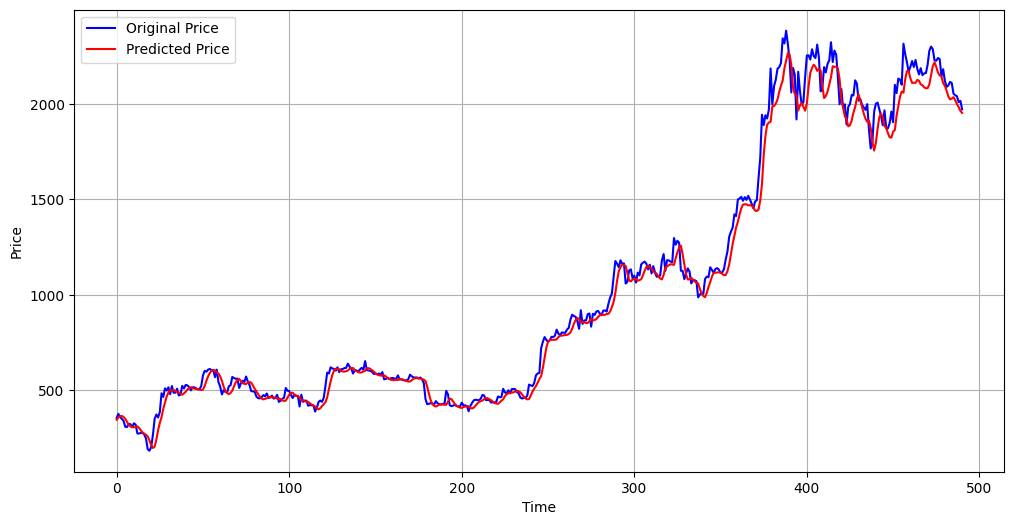

In [36]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
predicted_price = scaler.inverse_transform(y_pred)

In [44]:
y_pred.shape

(491, 1)

In [ ]:
y_test.shape

(491,)

In [48]:
y_pred

array([[ 345.54294],
       [ 356.64993],
       [ 364.54544],
       [ 365.078  ],
       [ 359.50732],
       [ 350.0573 ],
       [ 333.7207 ],
       [ 317.90424],
       [ 310.12933],
       [ 307.93225],
       [ 305.2824 ],
       [ 307.886  ],
       [ 310.74176],
       [ 301.93735],
       [ 289.3319 ],
       [ 278.76355],
       [ 271.77057],
       [ 266.20065],
       [ 257.73904],
       [ 236.71175],
       [ 212.6738 ],
       [ 197.0872 ],
       [ 204.11613],
       [ 240.92505],
       [ 289.64313],
       [ 328.31567],
       [ 358.80792],
       [ 401.94366],
       [ 435.90256],
       [ 467.92026],
       [ 487.95468],
       [ 501.4561 ],
       [ 499.30188],
       [ 501.29138],
       [ 496.0934 ],
       [ 489.06622],
       [ 488.37592],
       [ 482.07974],
       [ 476.17154],
       [ 483.34366],
       [ 491.7299 ],
       [ 503.23904],
       [ 512.4955 ],
       [ 515.98126],
       [ 511.4661 ],
       [ 508.34656],
       [ 506.86496],
       [ 505.

In [49]:
y_test

array([ 355.17487142,  376.03140587,  359.69592212,  349.40253101,
        339.36524613,  308.20078109,  307.254577  ,  323.30073301,
        321.70618133,  306.08922461,  326.84974968,  319.73474006,
        273.45635219,  273.0683346 ,  276.48535868,  276.24598505,
        267.51303061,  246.6488609 ,  190.29493062,  182.98473442,
        201.49821769,  265.19158561,  349.76390641,  372.57653037,
        357.18432656,  385.3321315 ,  483.94269646,  464.89336389,
        509.50864517,  498.22007057,  515.21202453,  479.09804055,
        521.78939789,  486.82703907,  486.88617175,  507.66440413,
        472.13005037,  477.46336313,  522.39112163,  509.29599496,
        527.79932496,  524.99425912,  516.18901335,  499.17594058,
        514.89069366,  515.30218562,  509.7359161 ,  504.81685699,
        505.72910852,  521.75105912,  576.64405484,  600.85141401,
        596.8587398 ,  607.67214108,  611.27501073,  604.32139758,
        604.19078584,  567.99646914,  607.60919077,  542.11365

In [50]:
y_test = y_test.reshape(-1, 1)

In [51]:
test_price = scaler.inverse_transform(y_test)

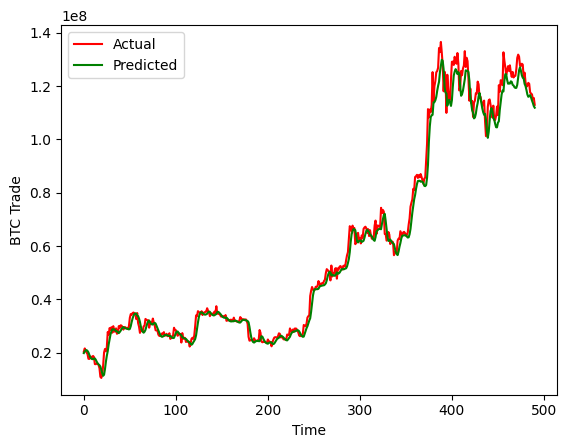

In [52]:
#Actual Stock Price and the Predicted Stock Price
plt.plot(test_price, color = 'red', label = 'Actual')
plt.plot(predicted_price, color = 'green', label = 'Predicted')

plt.xlabel('Time')
plt.ylabel('BTC Trade')
plt.legend()
plt.show()